# Result Plots

## Data Loading and Cleaning 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

medium_gt_trained = pd.read_csv('../data/test_results_medium/test_output_gt.csv')
medium_vio_trained = pd.read_csv('../data/test_results_medium/test_output_vio.csv')

hard_gt_trained = pd.read_csv('../data/test_results_hard/test_output_gt.csv')
hard_vio_trained = pd.read_csv('../data/test_results_hard/test_output_vio.csv')

In [11]:
def clean_df(df: pd.DataFrame):
    def to_float(x):
        if isinstance(x, str):
            return float(x.replace("tensor(", "").replace(")", ""))
        elif hasattr(x, 'item'):
            return x.item()
        elif isinstance(x, (float, int)):
            return float(x)
        else:
            raise TypeError(f"Unrecognized type in tensor column: {type(x)}")

    model_vio_col = df.columns[1]
    vio_gt_col = df.columns[2]
    model_gt_col = df.columns[3]

    df["Model vs. VIO"] = df[model_vio_col].apply(to_float)
    df["VIO vs. GT"] = df[vio_gt_col].apply(to_float)
    df["Model vs. GT"] = df[model_gt_col].apply(to_float)

    del df[model_vio_col]
    del df[vio_gt_col]
    del df[model_gt_col]
clean_df(medium_gt_trained)
clean_df(medium_vio_trained)
clean_df(hard_gt_trained)
clean_df(hard_vio_trained)
medium_gt_trained.head(5)

,Unnamed: 0,Model vs. VIO,VIO vs. GT,Model vs. GT
0,0,0.5041,1.0234,0.5414
1,1,0.5043,1.0236,0.5412
2,2,0.5042,1.0237,0.5413
3,3,0.5042,1.0238,0.5414
4,4,0.5042,1.0238,0.5413


,Unnamed: 0,Model vs. VIO Pose,VIO vs. Ground Truth Pose,Model vs. Ground Truth Pose
0,0,tensor(0.5041),tensor(1.0234),tensor(0.5414)
1,1,tensor(0.5043),tensor(1.0236),tensor(0.5412)
2,2,tensor(0.5042),tensor(1.0237),tensor(0.5413)
3,3,tensor(0.5042),tensor(1.0238),tensor(0.5414)
4,4,tensor(0.5042),tensor(1.0238),tensor(0.5413)


## Data Visualizations

In [28]:
def plot_all_in_grid(df: pd.DataFrame, window: int = 50):
    timestamps = df.index if df.index.is_monotonic_increasing else range(len(df))
    model_vio = df["Model vs. VIO"]
    vio_gt = df["VIO vs. GT"]
    model_gt = df["Model vs. GT"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    ax1, ax2 = axes

    # Error Over Time
    ax1.plot(timestamps, model_vio, label="Model vs. VIO")
    ax1.plot(timestamps, vio_gt, label="VIO vs. Ground Truth")
    ax1.plot(timestamps, model_gt, label="Model vs. Ground Truth")
    ax1.set_title("Error Over Time")
    ax1.set_xlabel("Timestep")
    ax1.set_ylabel("Pose Error")
    ax1.legend()

    # Rolling Correlation
    df_tmp = pd.DataFrame({
        "timestep": timestamps,
        "model_vio": model_vio,
        "vio_gt": vio_gt
    }).set_index("timestep")

    rolling_corr = df_tmp["model_vio"].rolling(window=window).corr(df_tmp["vio_gt"])
    ax2.plot(rolling_corr.index, rolling_corr, label=f"Rolling Corr (window={window})")
    ax2.set_title("Rolling Correlation")
    ax2.set_xlabel("Timestep")
    ax2.set_ylabel("Correlation")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    final_corr = model_vio.corr(vio_gt)
    print(f"Final Correlation (Model vs. VIO and VIO vs. GT): {final_corr:.4f}")

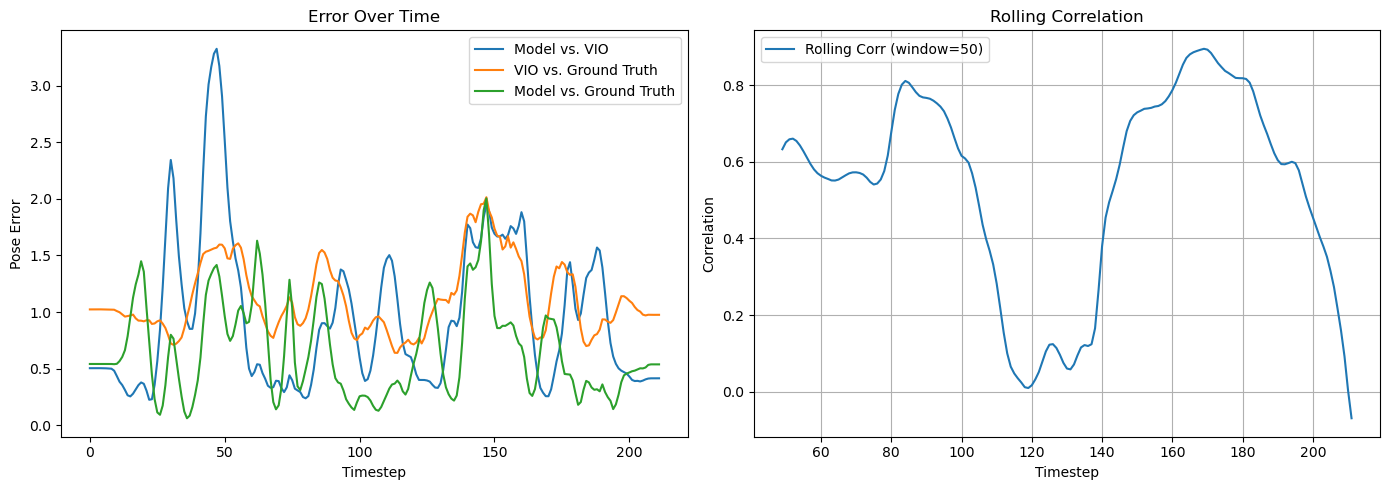

Final Correlation (Model vs. VIO and VIO vs. GT): 0.5360


In [29]:
plot_all_in_grid(medium_gt_trained)


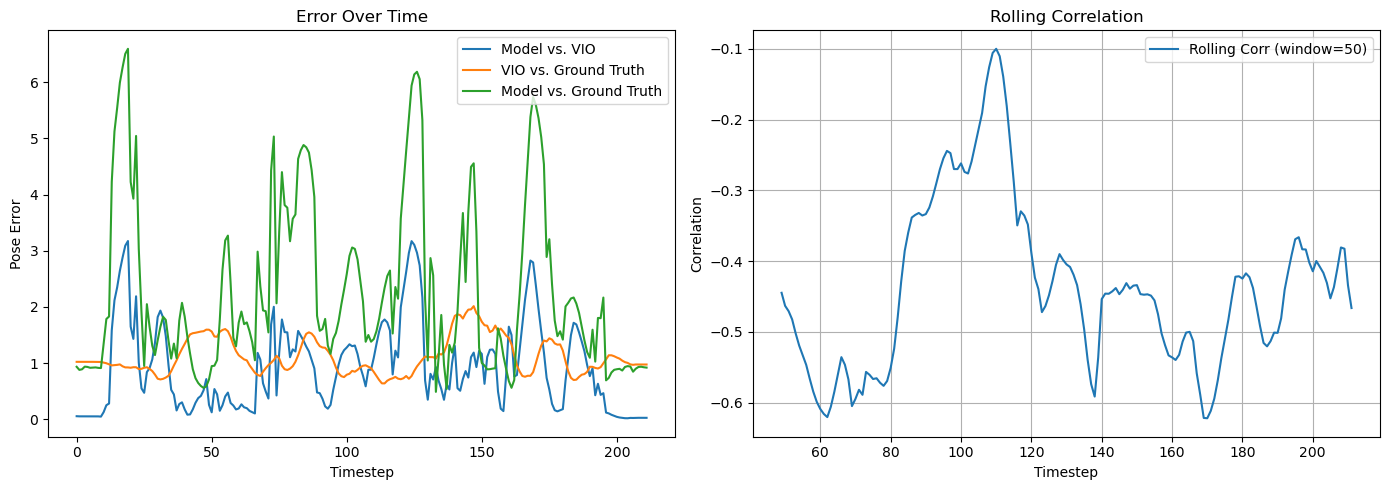

Final Correlation (Model vs. VIO and VIO vs. GT): -0.3309


In [30]:
plot_all_in_grid(medium_vio_trained)

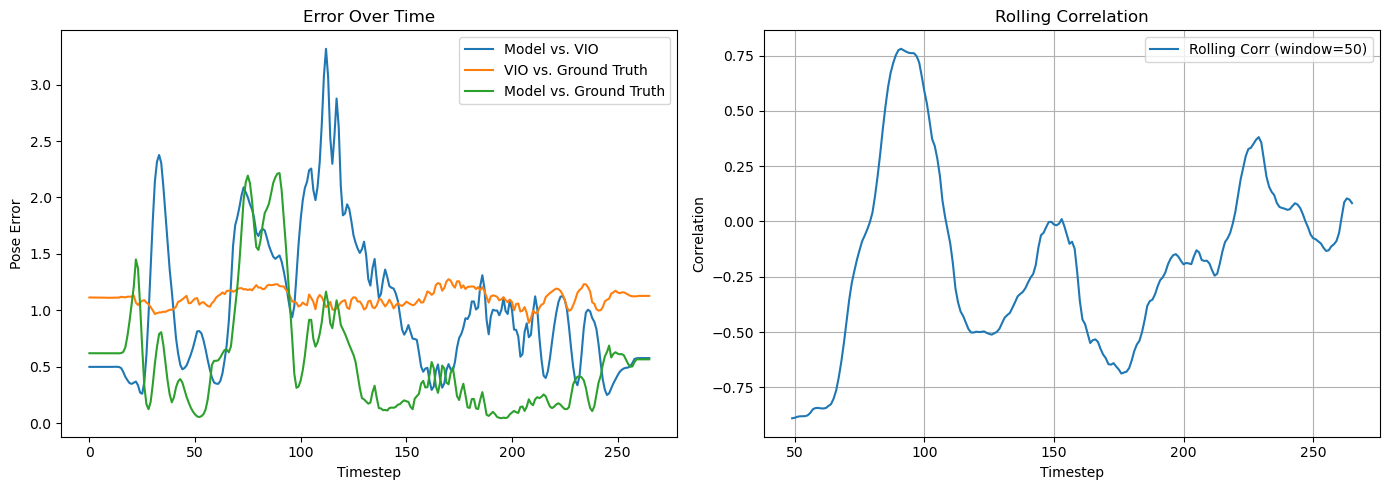

Final Correlation (Model vs. VIO and VIO vs. GT): -0.1545


In [31]:
plot_all_in_grid(hard_gt_trained)

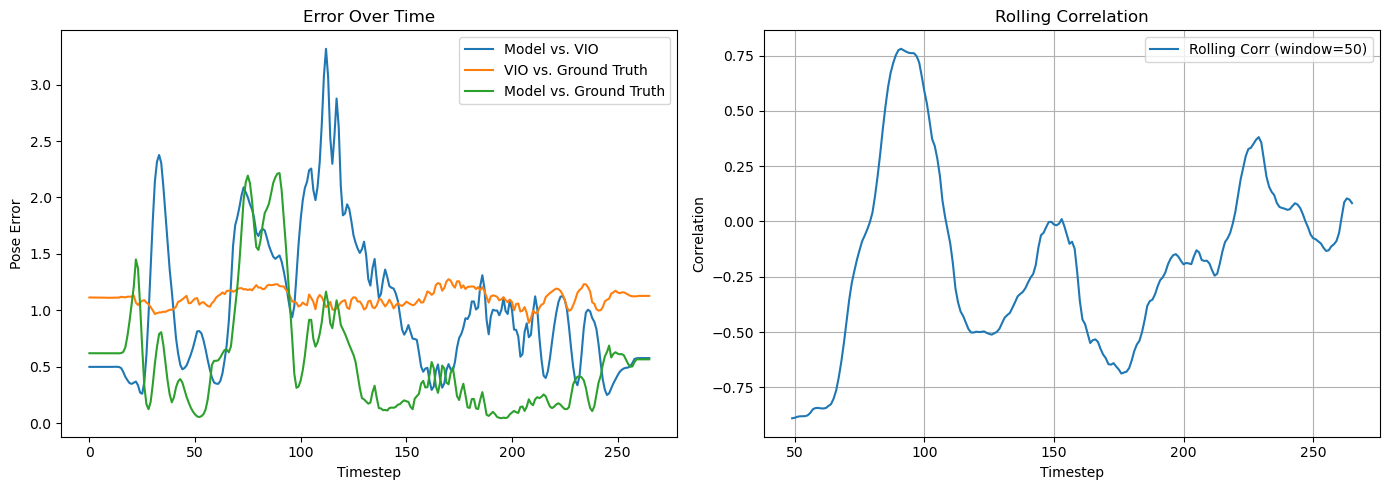

Final Correlation (Model vs. VIO and VIO vs. GT): -0.1545


In [32]:
plot_all_in_grid(hard_vio_trained)